In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prices = np.asarray([500, 300, 200])
capacity = 100
time = np.arange(600)

In [3]:
mui = np.asarray([0.001, 0.015, 0.05])
vi = np.asarray([0.01, 0.005, 0.0025])
probs = mui[:, None]*np.exp(np.outer(vi, time))
probs[1, :] += probs[0, :]
probs[2, :] += probs[1, :]  # Cumulative probability of someone willing to pay 500/300/200

In [4]:
value_matrix = np.zeros((capacity, 600))
alpha_matrix = np.zeros((capacity, 600))
value_matrix[0, :] = 0  # If no seats are left revenue is always 0
alpha_matrix[0, :] = np.nan # If no seats are left there is no policy

for t in reversed(time):
    for state in range(1, capacity):
        if t == 599:
            values = probs[:, t]*prices
        else:
            values = probs[:, t]*prices + \  # Direct earnings
                     probs[:, t]*value_matrix[state-1, t+1] + \  # Earnings if a ticket is sold
                     (1-probs[:, t])*value_matrix[state, t+1]  # Earnings if a ticket is not sold

        value_matrix[state, t] = values.max()
        alpha_matrix[state, t] = prices[values.argmax()]
        
        

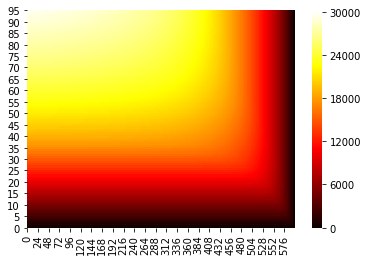

In [5]:
ax = sns.heatmap(value_matrix, cmap='hot')
ax.invert_yaxis()

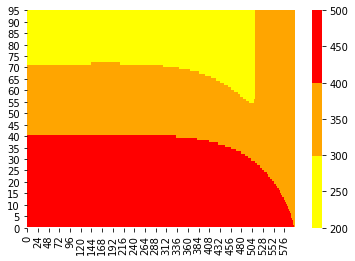

In [6]:
ax = sns.heatmap(alpha_matrix, cmap=['yellow', 'orange', 'red'])
ax.invert_yaxis()

In [7]:
def simulate(probs, alpha_matrix, capacity=99, time=600):
    revenue = [0]
    capacities = [capacity]
    prices_t = []
    ticket_sold = []
    
    for t in np.arange(time):
        p = np.random.uniform()
        anarray = np.where((probs[:, t] > p) == True)[0]
        
        if anarray.size > 0:
            wtp = prices[min(anarray)]
        else:
            wtp = 0
            
        price = alpha_matrix[capacities[-1], t]
        prices_t.append(price)
        
        if (wtp > price) and (capacities[-1] > 0):
            capacities.append(capacities[-1]-1)
            revenue.append(revenue[-1] + price)
            ticket_sold.append(price)
        else:
            capacities.append(capacities[-1])
            revenue.append(revenue[-1])
            ticket_sold.append(np.nan)
            
    return np.asarray([revenue[1:]]), np.asarray([capacities[1:]]), np.asarray([prices_t]), np.asarray([ticket_sold])

In [8]:
its = 500
revenues = np.zeros((its, 600))
capacities = np.zeros((its, 600))
prices_t = np.zeros((its, 600))
ticket_sold = np.zeros((its, 600))

for i in np.arange(its):
    r, c, p, t = simulate(probs, alpha_matrix)
    revenues[i, :] = r
    capacities[i, :] = c
    prices_t[i, :] = p
    ticket_sold[i, :] = t

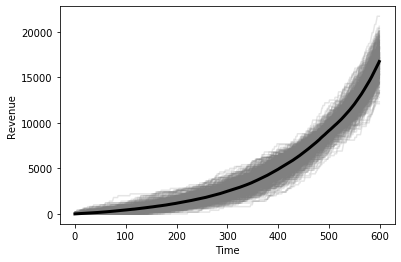

In [9]:
plt.plot(revenues.T, c='gray', alpha = 0.2)
plt.plot(revenues.mean(axis=0), c='black', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.show()

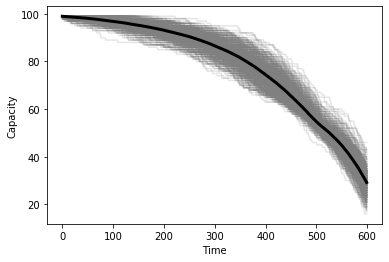

In [10]:
plt.plot(capacities.T, c='gray', alpha = 0.2)
plt.plot(capacities.mean(axis=0), c='black', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Capacity')
plt.show()

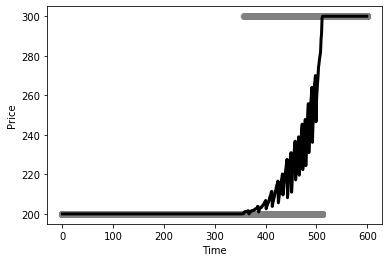

In [11]:
plt.plot(prices_t.T, 'o', c='gray', alpha = 0.2)
plt.plot(prices_t.mean(axis=0), c='black', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

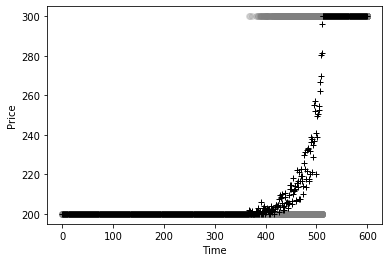

In [12]:
plt.plot(ticket_sold.T, 'o', c='gray', alpha = 0.2)
plt.plot(np.nanmean(ticket_sold, axis=0), '+', c='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()